### Anomaly Detection
It is an algorithm that detects and highlights ouliers (unexpected data points). The idea is to draw a decision boundary around normal data points, such that the unexpect data points are outlying as undesired.

It has lot of practical usage like unusual network traffic detection, unusual transaction detection, etc.

In [83]:
import numpy as np

from sklearn import svm

import matplotlib.pyplot as plotter
import matplotlib.font_manager

#### Prepare Data
We will prepare random data for training and testing purpose along with outlier dataset.

In [84]:
x = 0.1 * np.random.randn(50, 2)
x_train = np.r_[x + 1.5, x - 1.5]
print("TRAINING DATASET \n\t min: %f, max: %f" % (x_train.min(), x_train.max()))

x = 0.09 * np.random.randn(20, 2)
x_test = np.r_[x + 1.5, x - 1.5]
print("TESTING DATASET \n\t min: %f, max: %f" % (x_test.min(), x_test.max()))

x_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
print("TRAINING DATASET \n\t min: %f, max: %f" % (x_outliers.min(), x_outliers.max()))

TRAINING DATASET 
	 min: -1.782149, max: 1.724842
TESTING DATASET 
	 min: -1.700652, max: 1.727855
TRAINING DATASET 
	 min: -5.990785, max: 5.879809


#### Training
We will train our model using SVM with 'rbf' kernel and make predictions on above dataset.

NOTE: Predicition will be highlight inliers as '1' and outliers as '-1', we will take number of errors in each dataset to be plotted later.

In [85]:
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(x_train)

y_train = model.predict(x_train)
y_test = model.predict(x_test)
y_outliers = model.predict(x_outliers)

error_train = y_train[y_train == -1].size
error_test = y_test[y_test == -1].size
error_outliers = y_outliers[y_outliers == -1].size
print("NO OF TRAINING ERROR: %f, NO OF TESTING ERROR: %f, NO OF OUTLIERS ERROR: %f" % 
      ((error_train), (error_test), (error_outliers)))

NO OF TRAINING ERROR: 9.000000, NO OF TESTING ERROR: 5.000000, NO OF OUTLIERS ERROR: 20.000000


In the above output, we can see that the model trained with training dataset sets out all the anamolies as error, as in case of outliers data maximum are marked as error while in testing data few are marked as error.

#### Visualize
We will plot a mesh plot to see decision boundary for detecting anomalies.

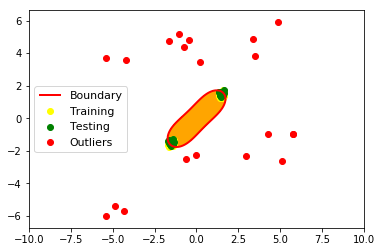

In [86]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-5, 5, 500))

boundary = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
decision_boundary = plotter.contour(xx, yy, boundary, levels=[0], linewidths=2, colors='red')
plotter.contourf(xx, yy, boundary, levels=[0, boundary.max()], colors='orange')

training_data = plotter.scatter(x_train[:, 0], x_train[:, 1], c='yellow')
testing_data = plotter.scatter(x_test[:, 0], x_test[:, 1], c='green')
outliers_data = plotter.scatter(x_outliers[:, 0], x_outliers[:, 1], c='red')

plotter.legend([decision_boundary.collections[0], training_data, testing_data, outliers_data],
               ["Boundary", "Training","Testing", "Outliers"],
               prop=matplotlib.font_manager.FontProperties(size=11))
plotter.show()